## Importando bibliotecas

In [ ]:
import cv2 # manipulacao e abertura de imagens
import numpy as np # uso de arrays e vetorização
import matplotlib.pyplot as plt # mostrar imagens 
# configuração para plotar as imagens dentro do notebook
%matplotlib inline

# configura ticks para nao aparecerem
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False


## Testando abertura de Imagens

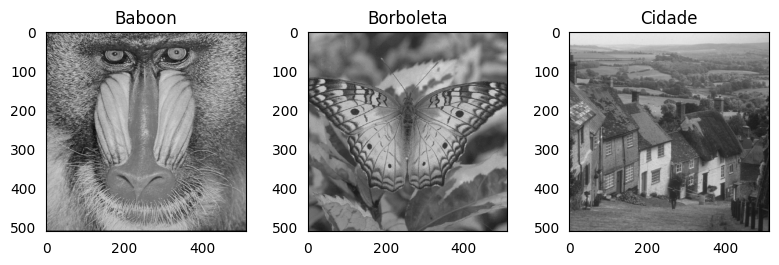

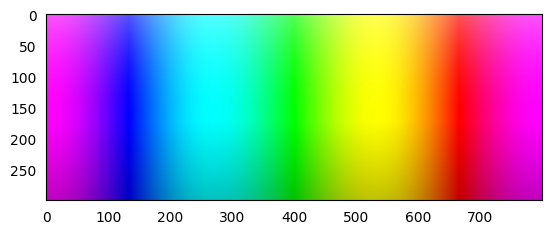

In [ ]:
# imagens grayscale
baboon = cv2.imread('baboon.png')
borboleta = cv2.imread('borboleta.png')
cidade = cv2.imread("city.png")

# Imagens coloridas - Formato BGR
tom_platz = cv2.imread("tom_platz.jpeg")
rgb_circle = cv2.imread("aaa.jpeg")

img, (fig1, fig2, fig3) = plt.subplots(1,3, figsize=(8,8))
img.tight_layout()
fig1.imshow(baboon)
fig1.set_title('Baboon')
fig2.imshow(borboleta)
fig2.set_title('Borboleta')
fig3.imshow(cidade)
fig3.set_title('Cidade')
plt.show()
plt.imshow(rgb_circle)
plt.show()


## Funções Auxiliares

In [ ]:
def multi_plots(rows, cols, images, labels, sz, suptitle, one_index=False):
    fig, axs = plt.subplots(rows, cols, figsize=sz)
    fig.suptitle(suptitle)
    fig.tight_layout()
    
    if one_index:
        for i in range(cols):
            axs[i].imshow(images[i])
            axs[i].set_title(labels[i])
    else:
        for i in range(rows):
            for j in range(cols):
                axs[i,j].imshow(images[i*cols + j])
                axs[i,j].set_title(labels[i*cols + j])

## Questões

### 1.1 Mosaico

75 200 (4, 4, 75, 200, 3)


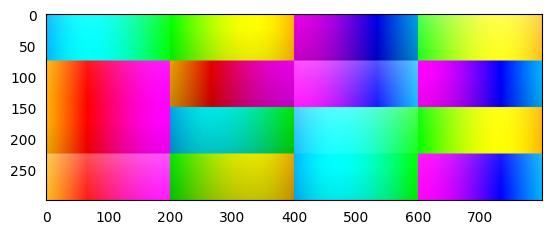

In [ ]:
order = np.array([6, 11, 13, 3, 8, 16, 1, 9, 12, 14, 2, 7, 4, 15, 10, 5])
order -= 1 

def mosaic_image(img, perm_order=order, n=4):
    '''
    Retorna um mosaico da imagem conforme a ordem apresentada.

    Keyword arguments:
    img : imagem
    perm_order : ordem de permutação das imagem
    n: numero de divisões
    '''
    res = np.split(img, n) # divide em 4 partes 
    res = np.array([np.split(t, n, axis=1) for t in res]) # divide as 4 partes novamente em 4

    # pega os fatores para funcionar em imagens de diferentes sizes 
    a, b = res.shape[2], res.shape[3]
    # print(a,b, res.shape)
    # aqui precisa ser reshapado para dar certo a posicao - escrever no relatorio
    res = res.reshape(16, a, b,-1)[perm_order] # permuta com a ordem do enunciado

    res = res.reshape(4, 4, a, b, -1) # retorna a posição de (4,4)

    # return res
    return np.concatenate(np.concatenate(res, axis=1), axis=1) # remonta a imagem concatenando os pedaços



plt.imshow(mosaic_image(rgb_circle))

### 1.2 Combinação de Imagens
- Agregar duas imagens monocromáticas por meio da média ponderada


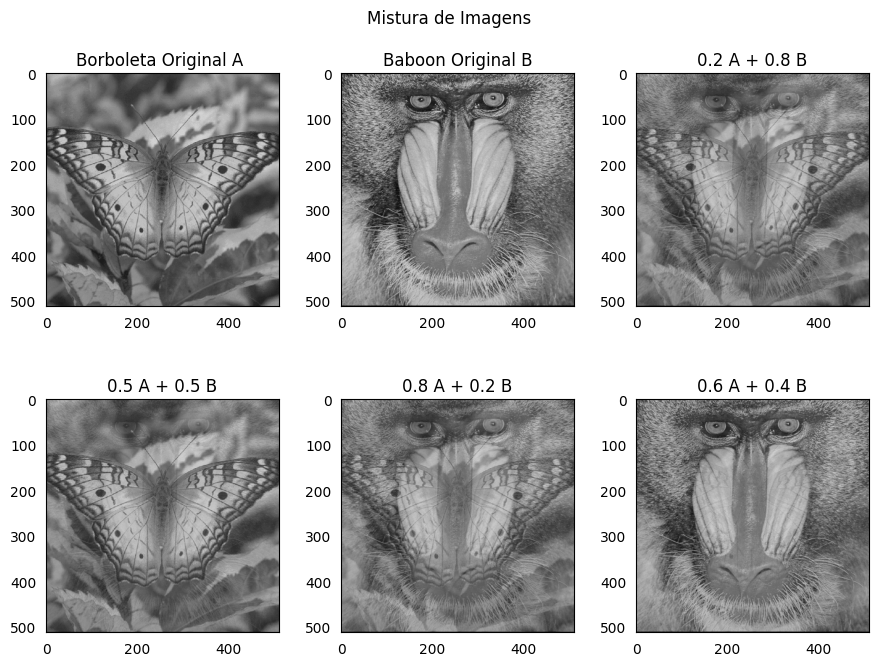

In [ ]:
def merge_images(weight_a, weight_b, img_a, img_b):
    '''
    Combina duas imagens monocromáticas de tamanhos iguais com média ponderada.

    Keyword arguments:
    weight_A : peso para imagem a 
    weight_b : peso para imagem b
    img_a: primeira imagem
    img_b: segunda imagem

    '''
    soma_pesos = weight_a + weight_b

    new_A = np.array((weight_a/soma_pesos) * img_a , np.uint8)
    new_B = np.array((weight_b/soma_pesos) * img_b , np.uint8) 

    return new_A + new_B


merged_coef = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2), (0.6, 0.4)]
merged_label = ['Borboleta Original A ', 'Baboon Original B', '0.2 A + 0.8 B', '0.5 A + 0.5 B', '0.8 A + 0.2 B', '0.6 A + 0.4 B']
# merged_label = merged_label[::-1]
merged_ans = [ merge_images(merged_coef[i][0], merged_coef[i][1], borboleta, baboon) for i in range(len(merged_coef))]

merged_ans.append(baboon)
merged_ans.append(borboleta)

merged_ans = merged_ans[::-1]

multi_plots(2,3, merged_ans, merged_label, (9,7), "Mistura de Imagens")

### 1.3 Transformação de Intensidade

- Inverter níveis de cinza
- Converter o intervalo de cinza entre [A, B]
- Inverter os pixels das linhas pares
- Espelhar as linhas da metade superior na parte inferior
- Espelhar a imagem verticalmente

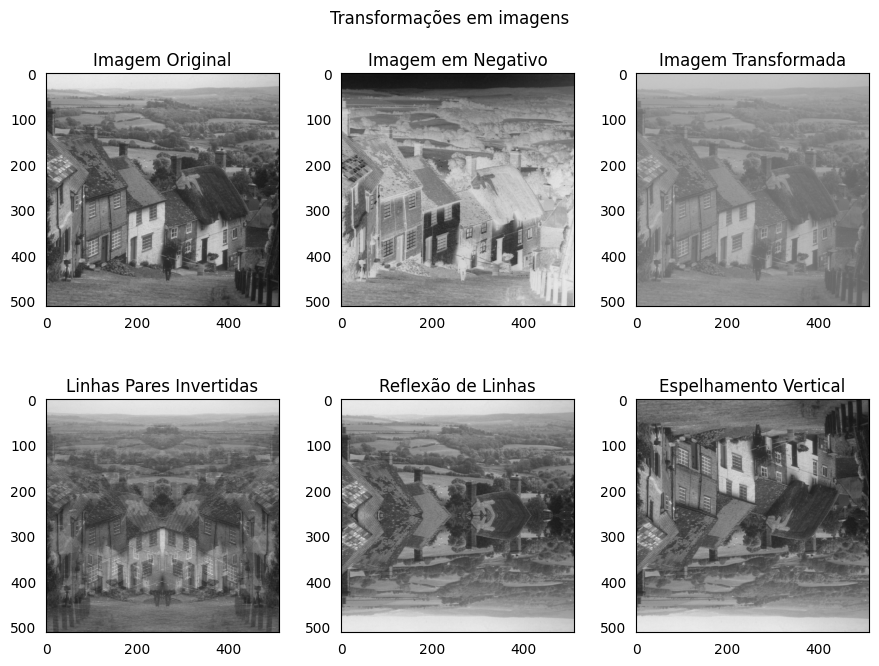

In [ ]:
def inverter_nivel_cinza(img):
    return 255 - img

def converter_intervalo(img, a=100, b=200):

    res = np.copy(img) 
    
    a_coef = (np.max((a,b)) - np.min((a,b))) / (np.amax(img) - np.amin(img))    
    res = (a_coef * (img - np.amin(img))) + a
    return res.astype(np.uint8)

def inverter_pixels_linhas_pares(img):
    res = np.copy(img)
    res[1::2, :] = res[1::2, ::-1]
    return res

def espelhar_parte_inferior(img):
    res = np.copy(img)
    size_to_flip = (res.shape[0]) // 2
    res[size_to_flip -1 :, ] = res[size_to_flip::-1, ]
    return res

def espelhamento_vertical(img):
    return img[::-1]

gray_level = inverter_nivel_cinza(cidade)
interval = converter_intervalo(cidade)
linha_par = inverter_pixels_linhas_pares(cidade)
mirror_inferior = espelhar_parte_inferior(cidade)
mirror = espelhamento_vertical(cidade)

res_imgs = [cidade, gray_level, interval, linha_par, mirror_inferior, mirror]
res_labels = ['Imagem Original', 'Imagem em Negativo', 'Imagem Transformada', 'Linhas Pares Invertidas', 'Reflexão de Linhas', 'Espelhamento Vertical']

multi_plots(2,3, res_imgs, res_labels, (9,7), "Transformações em imagens")



### 1.4 Imagens Coloridas

a. Com um imagem colorida RGB, alterar a imagem conforme as operações: 

$$ R’ = 0.393R + 0.769G + 0.189B\\
G’ = 0.349R + 0.686G + 0.168B\\
B’ = 0.272R + 0.534G + 0.131B $$

Caso necessário, truncar valores se maior que 255

b. Dada uma imagem colorida transformar ela em um canal de cor na forma:

$$ I = 0.2989R + 0.5870G + 0.1140B $$

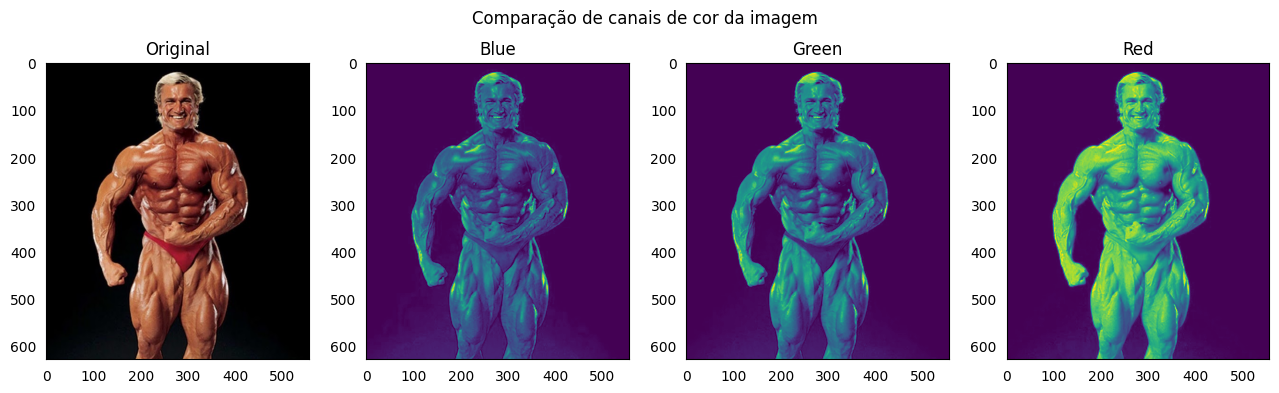

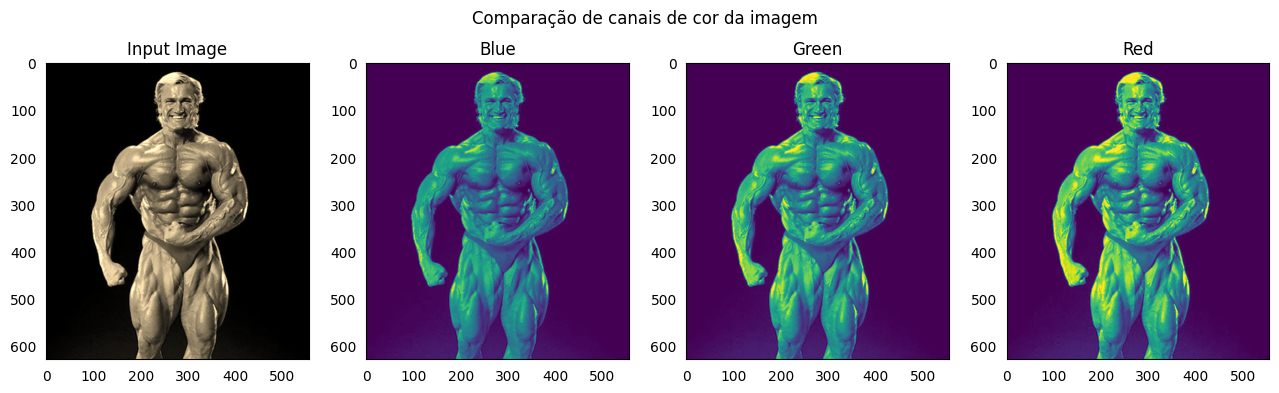

In [ ]:
# funcao "wrapper" para plotar a imagem com o canal colorido
def show_image_and_channels(img, title="Original"):
    
    titles = ['Blue', 'Green', 'Red']

    fig, axs = plt.subplots(1, 4, figsize=(13,13))
    fig.suptitle("Comparação de canais de cor da imagem")
    # axs[0].imshow(img)
    axs[0].imshow(img[:,:, ::-1]) # coloca-se a imagem ao inverso pois é preciso converter para RGB para uso do matplotlib
    axs[0].set_title(title)

    fig.tight_layout()
    fig.subplots_adjust(top=1.62)
    for i in range(1,4):
        axs[i].imshow(img[:, :, i - 1])
        axs[i].set_title(titles[i - 1])

def altera_canais_coloridos(img, coef, cv_loaded=True):
    '''
    Altera os canais coloridos da imagem conforme um coeficiente
    Keyword arguments:
    img :  imagem utilizada 
    coef : coeficiente para cada canal em forma matricial
    '''
    if cv_loaded == False:
        coef = coef[::-1]
    
    res = np.dot(np.copy(img), coef)
    res = np.array(res, dtype=np.uint32)
    res[res > 255] = 255

    return res

# color coeficient given in the instructions
color_coef = np.array([ [0.131, 0.168, 0.189],
                        [0.534, 0.686, 0.769], 
                        [0.272, 0.349, 0.393]])

# showing original image as comparison
show_image_and_channels(tom_platz)

# processing image color and showing it
res = altera_canais_coloridos(tom_platz, color_coef)
show_image_and_channels(res, "Input Image")

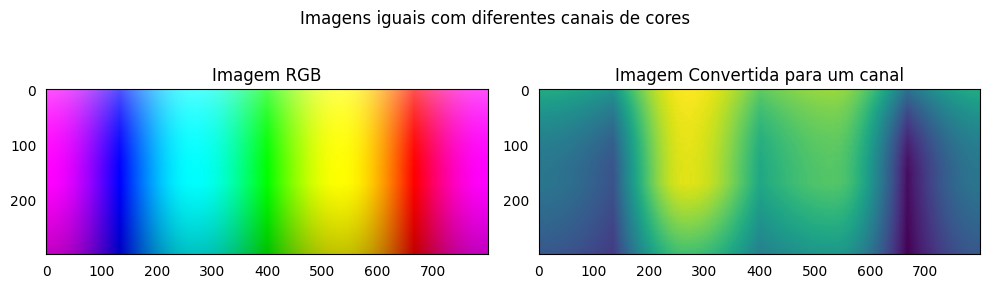

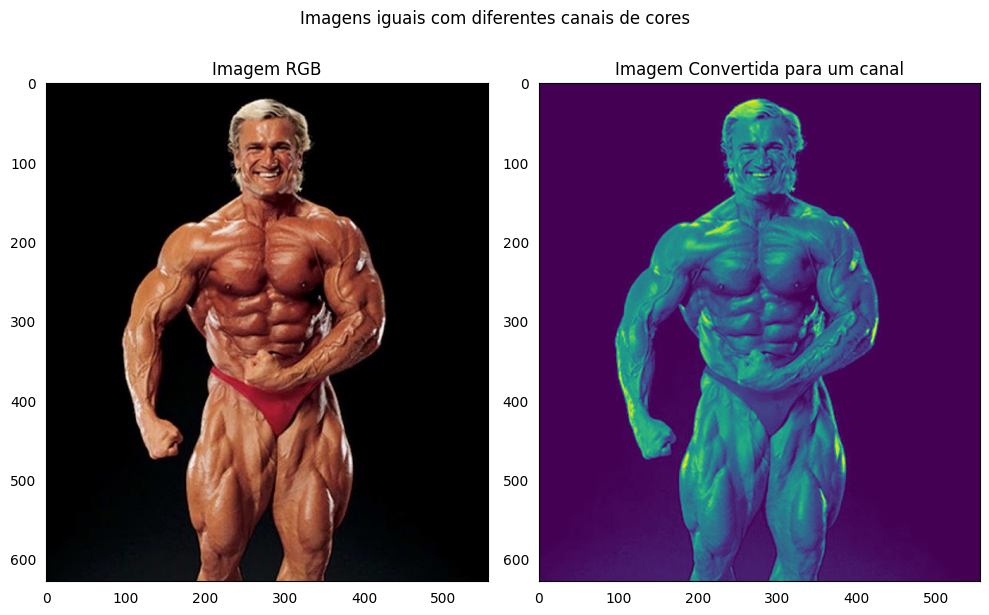

In [ ]:
intensity_map = [0.2989, 0.5870, 0.1140]

def altera_banda(img, c_map=intensity_map):
    res = np.dot(img, c_map[::-1])
    return np.array(res, dtype=np.uint8)

# funcao wrapper de plot
def compare_rgb_mono(img, sz):
    fig, ax = plt.subplots(1,2, figsize=(10,10))
    ax[0].imshow(img)
    ax[1].imshow(altera_banda(img))
    ax[0].set_title("Imagem RGB")
    ax[1].set_title("Imagem Convertida para um canal")
    fig.tight_layout()
    fig.subplots_adjust(top=sz)

    fig.suptitle("Imagens iguais com diferentes canais de cores")
    
compare_rgb_mono(rgb_circle, 1.62)
compare_rgb_mono(tom_platz[:,:,::-1], 1.3)

### 1.5 Ajuste de Brilho

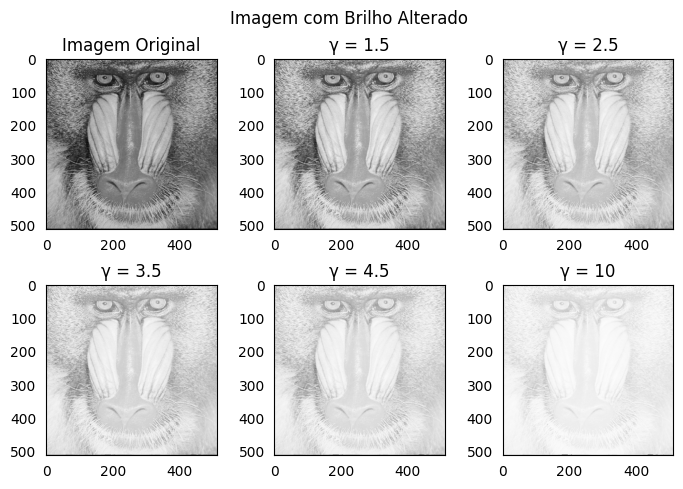

In [ ]:
def ajuste_brilho(img, gamma):
    res = np.copy(img)

    # normaliza intervalo 
    res = (res - np.amin(res)) / (np.amax(res) - np.amin(res))
    # aplica a operação
    res = np.power(res, 1/gamma)
    # converte
    res = res*255
    res[res > 255] = 255
    res = np.array(res, np.uint8)
    return np.array(res)

gamma = chr(947)

brilho_coef = [1.5, 2.5, 3.5, 4.5, 10]
brilho_imgs = [ajuste_brilho(baboon, brilho_coef[i]) for i in range(len(brilho_coef))]
brilho_labels = [gamma + " = " + str(brilho_coef[i]) for i in range(len(brilho_coef))]
brilho_imgs.insert(0, baboon)
brilho_labels.insert(0, "Imagem Original")

multi_plots(2, 3, brilho_imgs, brilho_labels, (7,5), "Imagem com Brilho Alterado")

### 1.6 Quantização de Imagens

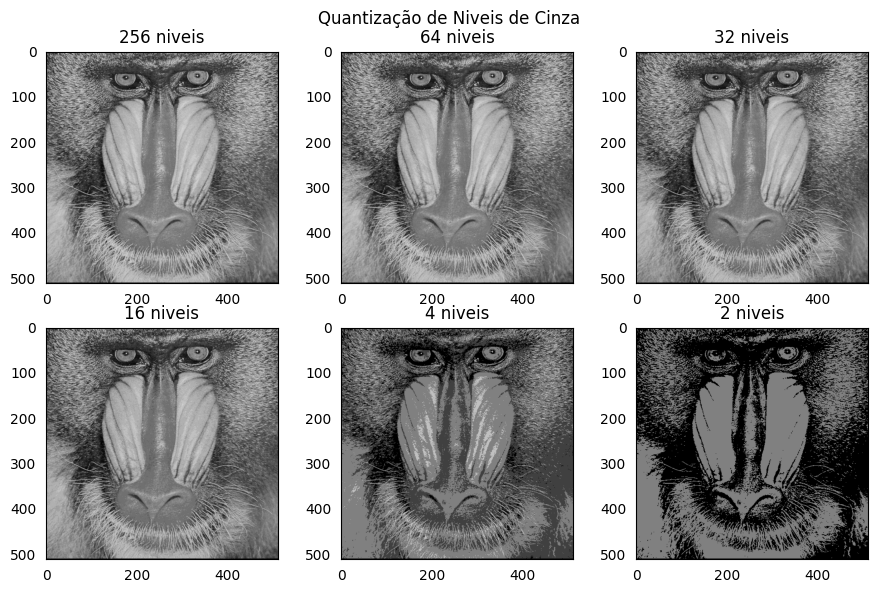

In [ ]:
def altera_quantizacao(img, level=2):

    res = np.copy(img)
    n = 256 // level
    res = (res // n) * n
    return res

quant_coef = [256, 64, 32, 16, 4, 2]
quant_labels = [str(quant_coef[i]) + ' niveis' for i in range(len(quant_coef))]
quant_imgs = [altera_quantizacao(baboon, quant_coef[i]) for i in range(len(quant_coef))]

multi_plots(2,3, quant_imgs, quant_labels, (7,5), "Quantização de Niveis de Cinza")

### 1.7 Planos de Bits

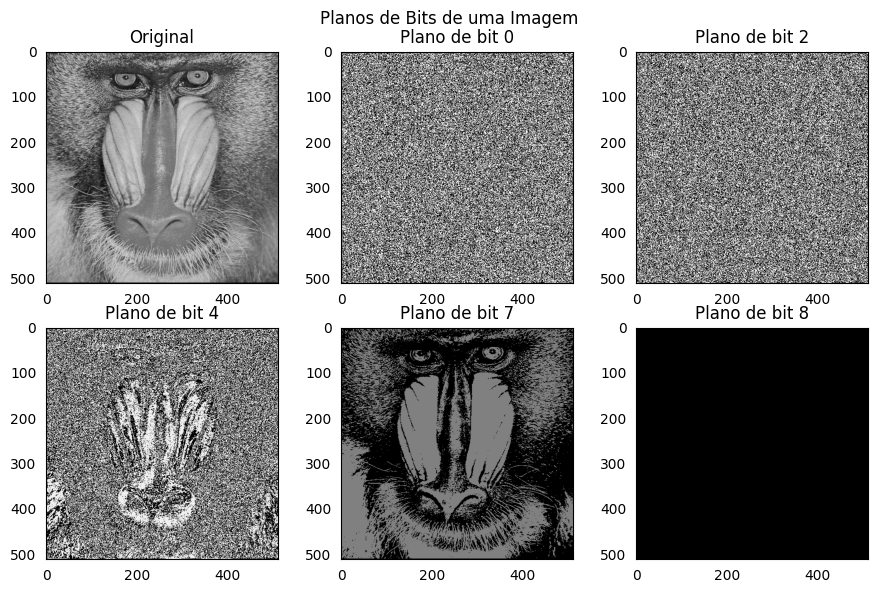

In [ ]:
def extrai_bits(img, m):

    res =  np.bitwise_and(img, 2**m) 
    return res * 255

bit_planes_coef = [0, 2, 4, 7, 8]
bit_planes_label = ["Plano de bit " + str(coef) for coef in bit_planes_coef]
bit_planes_imgs = [extrai_bits(baboon, k) for k in bit_planes_coef]

bit_planes_label.insert(0, "Original")
bit_planes_imgs.insert(0, baboon)

multi_plots(2,3, bit_planes_imgs, bit_planes_label, (9,6), "Planos de Bits de uma Imagem")

bit_planes_imgs[4]

### 1.8 Filtragem de Imagens

(512, 512, 3)


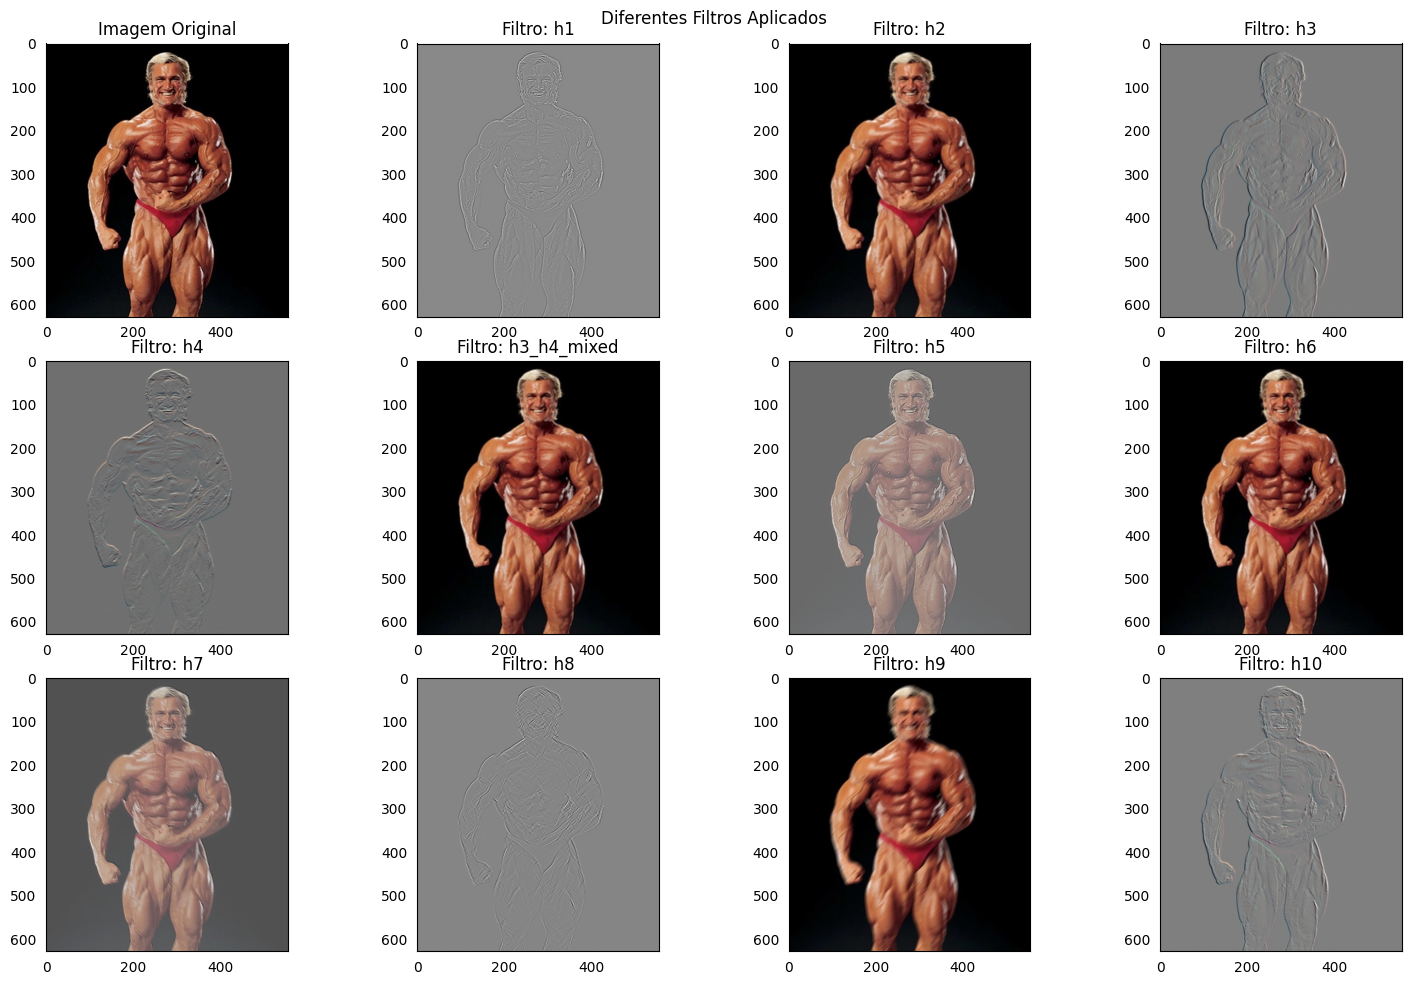

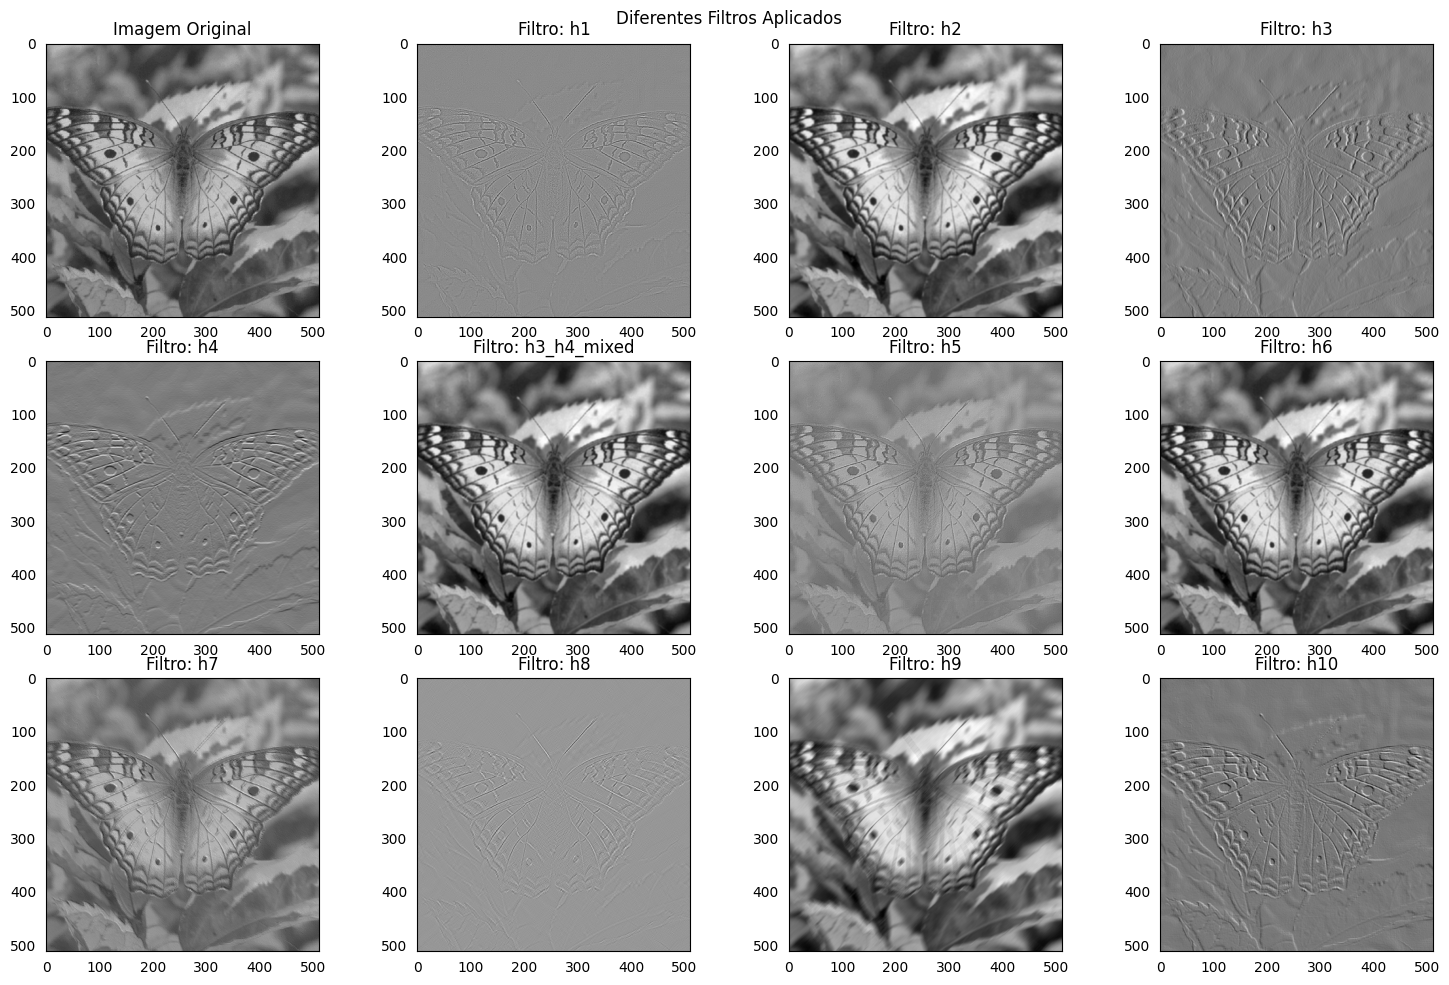

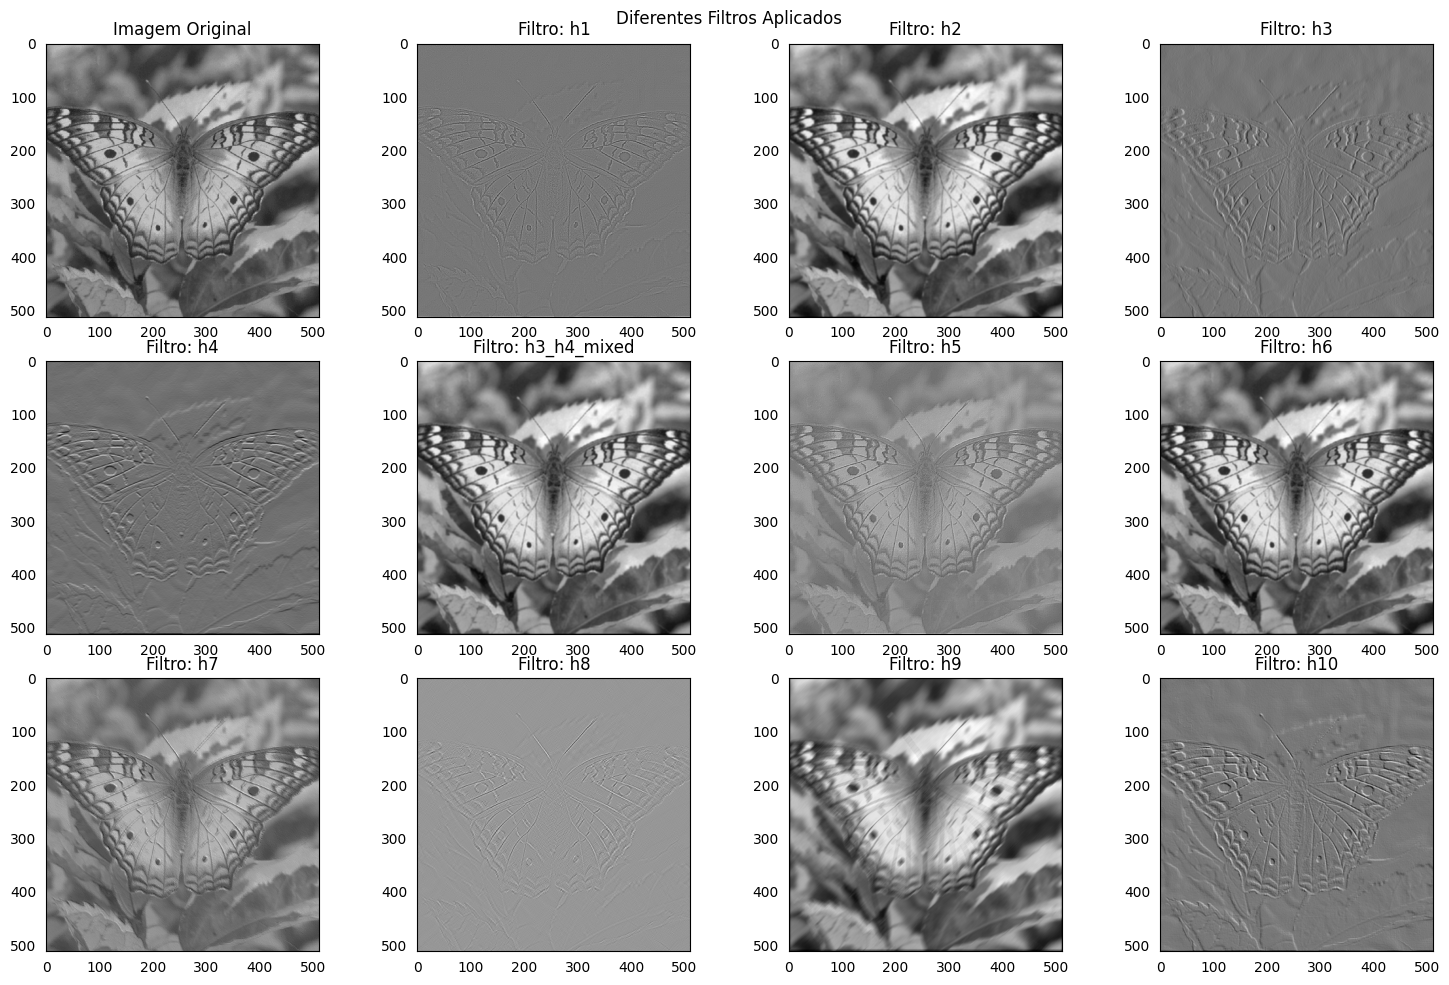

In [ ]:
import kernels as kr

def convolve_filter(img, used_filter, border_effect=cv2.BORDER_DEFAULT, flip=False):
  
    if flip == False:
        temp_img = cv2.filter2D(src=img, ddepth=3, kernel= used_filter, borderType=border_effect)
    else:
        temp_img = cv2.filter2D(src=img, ddepth=3, kernel= cv2.flip(used_filter,1), borderType=border_effect)


    # normalizando faixa 
    temp_img = (temp_img - np.amin(temp_img)) / (np.amax(temp_img) - np.amin(temp_img))
    
    return temp_img

convolve_labels = ["Filtro: " + kernel for kernel in list(kr.KERNEL_LIST.keys())]
convolve_labels.insert(0, "Imagem Original")


convolve_imgs = [convolve_filter(tom_platz[:, :, ::-1], h_filter, flip=True) for h_filter in list(kr.KERNEL_LIST.values())]
convolve_imgs.insert(0, tom_platz[:, :, ::-1])

multi_plots(3,4, convolve_imgs, convolve_labels, (15,10), "Diferentes Filtros Aplicados")


# usa a borboleta de imagem
convolve_imgs_2 = [convolve_filter(borboleta, h_filter, flip=True) for h_filter in list(kr.KERNEL_LIST.values())]
convolve_imgs_2.insert(0, borboleta)

print(convolve_imgs_2[1].shape)
multi_plots(3,4, convolve_imgs_2, convolve_labels, (15,10), "Diferentes Filtros Aplicados")



convolve_imgs_3 = [convolve_filter(borboleta, h_filter, cv2.BORDER_ISOLATED, flip=True) for h_filter in list(kr.KERNEL_LIST.values())]
convolve_imgs_3.insert(0, borboleta)

multi_plots(3,4, convolve_imgs_3, convolve_labels, (15,10), "Diferentes Filtros Aplicados")


